##### V1: consider only 2016, 2017 mass-shooting vs RTC
##### V2: consider 2015-2017 data, include different type of incident reported
##### V3: 2015-2017 data, different type of incident, population per state

# Hypothese: 

##### US seems to have the most gun violence reported compared to other countries. Does this because of the Right-To-Carry (RTC) that allows people carrying gun?

# Steps/Agenda:

        Part_1: Collecting data
        Part_2: Cleaning data
        Part_3: EDA
        Part_4: Modelling & Training data
        Part_5: Validate model with metric

# PART_1: COLLECTING DATA

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 12)

##### My plan was to scrape data from the website & put it into 1 csv file. However, as I was not successful with my script, I am downloading the data from the web, then join them together. 

In [2]:
mass2017_df = pd.read_csv(os.path.join('Mass_Shooting_2017.csv'))
mass2016_df = pd.read_csv(os.path.join('Mass_Shooting_2016.csv'))
mass2015_df = pd.read_csv(os.path.join('Mass_Shooting_2015.csv'))
perpertrator2017_df = pd.read_csv(os.path.join('PERPETRATOR_2017.csv'))
perpertrator2016_df = pd.read_csv(os.path.join('PERPETRATOR_2016.csv'))
perpertrator2015_df = pd.read_csv(os.path.join('PERPETRATOR_2015.csv'))
invasion2017_df = pd.read_csv(os.path.join('Home_Invasion_2017.csv'))
invasion2016_df = pd.read_csv(os.path.join('Home_Invasion_2016.csv'))
invasion2015_df = pd.read_csv(os.path.join('Home_Invasion_2015.csv'))
defensive2017_df = pd.read_csv(os.path.join('Defensive_Use_2017.csv'))
defensive2016_df = pd.read_csv(os.path.join('Defensive_Use_2016.csv'))
defensive2015_df = pd.read_csv(os.path.join('Defensive_Use_2015.csv'))
unintentional2017_df = pd.read_csv(os.path.join('Unintentional_Shooting_2017.csv'))
unintentional2016_df = pd.read_csv(os.path.join('Unintentional_Use_2016.csv'))
unintentional2015_df = pd.read_csv(os.path.join('Unintentional_Use_2015.csv'))

##### Before joing all files together, creating a new column to indicate the type of incident - Option 1

In [49]:
mass2017_df['Incident_Type'] = 'Mass_Shooting'
mass2016_df['Incident_Type'] = 'Mass_Shooting'
mass2015_df['Incident_Type'] = 'Mass_Shooting'
perpertrator2017_df['Incident_Type'] = 'Perpetrator'
perpertrator2016_df['Incident_Type'] = 'Perpetrator'
perpertrator2015_df['Incident_Type'] = 'Perpetrator'
invasion2017_df['Incident_Type'] = 'Invasion'
invasion2016_df['Incident_Type'] = 'Invasion'
invasion2015_df['Incident_Type'] = 'Invasion'
defensive2017_df['Incident_Type'] = 'Defensive'
defensive2016_df['Incident_Type'] = 'Defensive'
defensive2015_df['Incident_Type'] = 'Defensive'
unintentional2017_df['Incident_Type'] = 'Unintentional'
unintentional2016_df['Incident_Type'] = 'Unintentional'
unintentional2015_df['Incident_Type'] = 'Unintentional'

##### join all dataframe together with pandas concat

In [50]:
frames = [mass2017_df, mass2016_df,mass2015_df,
          perpertrator2017_df, perpertrator2016_df, perpertrator2015_df,
          invasion2017_df, invasion2016_df, invasion2015_df,
          defensive2017_df, defensive2016_df, defensive2015_df, 
          unintentional2017_df, unintentional2016_df, unintentional2015_df]

incident_report_df = pd.concat(frames)

incident_report_df

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations,Incident_Type
0,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,NaN,Mass_Shooting
1,"August 21, 2017",New Jersey,Newark,Fabyan Place,0,4,NaN,Mass_Shooting
2,"August 21, 2017",Maryland,Baltimore,Cottage Avenue and Park Heights Avenue,1,3,NaN,Mass_Shooting
3,"August 21, 2017",New Jersey,Newark,700 block of S 19th St,1,3,NaN,Mass_Shooting
4,"August 21, 2017",North Carolina,Whitakers,980 Fishing Creek Rd,4,0,NaN,Mass_Shooting
5,"August 21, 2017",Tennessee,Memphis,262 Decatur St,0,4,NaN,Mass_Shooting
6,"August 20, 2017",Illinois,Chicago,11901 S Loomis,2,5,NaN,Mass_Shooting
7,"August 20, 2017",New York,Brooklyn,100th St and Ave M,0,4,NaN,Mass_Shooting
8,"August 19, 2017",Ohio,Cleveland,11143 Superior Ave,1,4,NaN,Mass_Shooting
9,"August 16, 2017",New York,Wyandanch,Merritt Ave and 15th St,0,4,NaN,Mass_Shooting


In [51]:
incident_report_df.shape[1]

8

In [52]:
incident_report_df.count()

Incident Date     6957
State             6957
City Or County    6957
Address           6503
# Killed          6957
# Injured         6957
Operations           0
Incident_Type     6957
dtype: int64

In [53]:
incident_report_df['Year']=pd.DatetimeIndex(incident_report_df['Incident Date']).year

In [54]:
#incident_report_df['Month']=pd.DatetimeIndex(incident_report_df['Incident Date']).month

##### After getting the number of incident report by state, next step is to create a csv file that has gun carry law per state. I was expected to have only 1 variable with yes/no value. Suprising, so many different type to permit, carry law existing. 

In [55]:
#Law_df = pd.read_csv(os.path.join('Gun_Law.csv'))
Law_df = pd.read_csv(os.path.join('State_Laws_By_Year.csv'))
Law_df.count()

state                  1350
year                   1350
age18longgunpossess    1350
age18longgunsale       1350
age21handgunpossess    1350
age21handgunsale       1350
age21longgunpossess    1350
age21longgunsale       1350
age21longgunsaled      1350
alcoholism             1350
                       ... 
universal              1350
universalh             1350
universalpermit        1350
universalpermith       1350
violent                1350
violenth               1350
violentpartial         1350
waiting                1350
waitingh               1350
lawtotal               1350
Length: 136, dtype: int64

In [56]:
Law_df = Law_df.rename(index=str, columns={"state":"State"}) # rename to have consistent name with other files

In [57]:
US2015_df = pd.read_csv(os.path.join('US_Pop_2015.csv'))
US2017_df = pd.read_csv(os.path.join('US_Pop_2017.csv'))

In [58]:
del US2017_df['Rank']

In [59]:
Pop_df = pd.merge(US2015_df, US2017_df, on="State")
Pop_df.count()

State              50
2015 Population    50
2017 Population    50
dtype: int64

##### Merge the Incident, law by state & population by state files together

In [60]:
df1 = pd.merge(incident_report_df, Pop_df, on="State")
df = pd.merge(df1, Law_df, on = "State")
df

,Incident Date,State,City Or County,Address,# Killed,# Injured,...,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,...,0,0,0,1,1,41
1,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,...,0,0,0,1,1,43
2,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,...,0,0,0,1,1,44
3,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,...,0,0,0,1,1,44
4,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,...,0,0,0,1,1,49
5,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,...,0,0,1,1,1,50
6,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,...,0,0,1,1,1,51
7,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,...,0,0,1,1,1,54
8,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,...,0,0,1,1,1,54
9,"August 22, 2017",Illinois,Chicago,300 block of N Central Ave,0,4,...,0,0,1,1,1,58


# PART_2: CLEANING DATA

##### Rename certain columns for easier coding

In [61]:
df = df.rename(index=str, columns={"# Killed":"Number_Killed",
                                   "# Injured": "Number_Injured",
                                   "Permit Reciprocity[26]": "Permit_Recip",
                                  "Non-Resident Permits Available": "Non_Resident_Permits_Available"})

##### As I do not want to look at the incent at the daily leve, I will use the feature engineering process to create an incident_ year & month columns from the provided incident date, then drop the incident_date column. 
##### But before doing this, i want to first check if there is any doublicate record

In [62]:
df.duplicated(subset=None, keep=False).count()

187137

##### It doesn't seem to have any doublicate record. Doing another manual sanity check

In [63]:
# check the count for 1 specific state:
df[df.State == 'Oregon'].count()

Incident Date       1539
State               1539
City Or County      1539
Address             1431
Number_Killed       1539
Number_Injured      1539
Operations             0
Incident_Type       1539
Year                1539
2015 Population     1539
                    ... 
universal           1539
universalh          1539
universalpermit     1539
universalpermith    1539
violent             1539
violenth            1539
violentpartial      1539
waiting             1539
waitingh            1539
lawtotal            1539
Length: 146, dtype: int64

In [64]:
df[df.State == 'Oregon']

,Incident Date,State,City Or County,Address,Number_Killed,Number_Injured,...,violent,violenth,violentpartial,waiting,waitingh,lawtotal
177741,"June 27, 2016",Oregon,Woodburn,13436 Killiam Loop NE,3,1,...,0,0,1,0,0,16
177742,"June 27, 2016",Oregon,Woodburn,13436 Killiam Loop NE,3,1,...,0,0,1,0,0,16
177743,"June 27, 2016",Oregon,Woodburn,13436 Killiam Loop NE,3,1,...,0,0,1,0,0,16
177744,"June 27, 2016",Oregon,Woodburn,13436 Killiam Loop NE,3,1,...,0,0,1,0,0,16
177745,"June 27, 2016",Oregon,Woodburn,13436 Killiam Loop NE,3,1,...,0,0,1,0,0,16
177746,"June 27, 2016",Oregon,Woodburn,13436 Killiam Loop NE,3,1,...,0,0,1,0,0,16
177747,"June 27, 2016",Oregon,Woodburn,13436 Killiam Loop NE,3,1,...,0,0,1,0,0,16
177748,"June 27, 2016",Oregon,Woodburn,13436 Killiam Loop NE,3,1,...,0,0,1,0,0,16
177749,"June 27, 2016",Oregon,Woodburn,13436 Killiam Loop NE,3,1,...,0,0,1,0,0,16
177750,"June 27, 2016",Oregon,Woodburn,13436 Killiam Loop NE,3,1,...,0,0,1,0,0,24


##### The above show 57 records for Oregon state but it has different date, which confirmed there is no doublicated record

##### Remove irrelevant columns from  my dataset

In [65]:
del df['Incident Date']
del df['Operations']
del df['Address']
del df['City Or County']
df

,State,Number_Killed,Number_Injured,Incident_Type,Year,2015 Population,...,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,0,1,1,41
1,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,0,1,1,43
2,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,0,1,1,44
3,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,0,1,1,44
4,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,0,1,1,49
5,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,1,1,1,50
6,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,1,1,1,51
7,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,1,1,1,54
8,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,1,1,1,54
9,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,1,1,1,58


##### As my hypothesis is only to find if there is a positive relationship between RTC vs Gun Incident Report, I do not need both column Kill & Injured. Will group both of them into a column call Incident_Cnt. However, I won't drop these columns as i may need them later during the analysis

In [66]:
df['Incident_cnt'] = df["Number_Killed"] + df["Number_Injured"]  # assigned to a column
df

,State,Number_Killed,Number_Injured,Incident_Type,Year,2015 Population,...,violenth,violentpartial,waiting,waitingh,lawtotal,Incident_cnt
0,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,1,1,41,4
1,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,1,1,43,4
2,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,1,1,44,4
3,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,1,1,44,4
4,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,0,1,1,49,4
5,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,1,1,1,50,4
6,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,1,1,1,51,4
7,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,1,1,1,54,4
8,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,1,1,1,54,4
9,Illinois,0,4,Mass_Shooting,2017,"12,859,995",...,0,1,1,1,58,4


# PART_3: EDA

##### Get a description of the relevant variables

In [69]:
df.describe()

,Number_Killed,Number_Injured,Year,2017 Population,year,age18longgunpossess,...,violenth,violentpartial,waiting,waitingh,lawtotal,Incident_cnt
count,187137.000000,187137.000000,187137.000000,1.871370e+05,187137.000000,187137.000000,...,187137.000000,187137.000000,187137.000000,187137.000000,187137.000000,187137.000000
mean,0.472371,1.048911,2015.986005,1.268769e+07,2004.000000,0.195482,...,0.124540,0.252398,0.120906,0.223425,27.297456,1.521281
std,1.019751,1.670460,0.810733,1.080594e+07,7.788902,0.396573,...,0.330197,0.434390,0.326019,0.416542,24.238222,2.169415
min,0.000000,0.000000,2015.000000,5.897130e+05,1991.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,0.000000,2015.000000,5.030118e+06,1997.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000
50%,0.000000,1.000000,2016.000000,8.996351e+06,2004.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000
75%,1.000000,1.000000,2017.000000,1.988966e+07,2011.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,30.000000,1.000000
max,50.000000,53.000000,2017.000000,3.984987e+07,2017.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,106.000000,103.000000


##### Check to see if there is any null data

In [70]:
df.isnull().sum()

State                  0
Number_Killed          0
Number_Injured         0
Incident_Type          0
Year                   0
2015 Population        0
2017 Population        0
year                   0
age18longgunpossess    0
age18longgunsale       0
                      ..
universalh             0
universalpermit        0
universalpermith       0
violent                0
violenth               0
violentpartial         0
waiting                0
waitingh               0
lawtotal               0
Incident_cnt           0
Length: 143, dtype: int64

##### Check to see how many variables/columns

In [71]:
df.shape[1]

143

##### Top 10 states that have most gun incidents/violences

In [72]:
top10_df = df.State.value_counts().head(10)

In [73]:
top10_df.plot(kind='bar')

##### Understanding the dataset more

+ What incident type happens most?
+ Whate State gun incident has been reported/happened most?
+ Incident type by Stae

### Incident counted by type

In [74]:
Incidenttype_df = df[['Incident_cnt']].groupby([df['Incident_Type']]).sum().sort_values('Incident_cnt',ascending=False)

In [75]:
Incidenttype_df

,Incident_cnt
Incident_Type,
Mass_Shooting,130545
Perpetrator,50679
Unintentional,39096
Defensive,35775
Invasion,28593


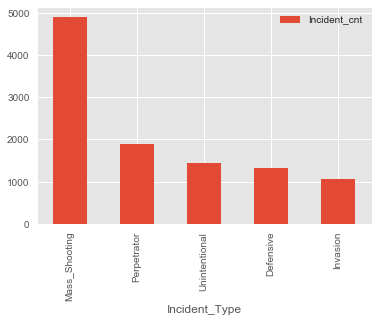

In [491]:
Incidenttype_df.plot(kind = 'bar')

In [ ]:
Incidentpermonth_df.plot(kind = 'bar')

##### From the above table, mass_shooting has highest recored while home invasion is the lowest

### Incident counted by year

In [519]:
Incident_by_year_df = df[['Incident_cnt']].groupby([df['Year']]).sum().sort_values('Incident_cnt',ascending=False).head(10)

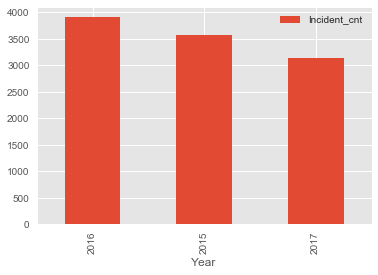

In [515]:
Incident_by_year_df.plot(kind = 'bar')

### Killed yearly trending

In [516]:
Killed_by_year_df = df[['Number_Killed']].groupby([df['Year']]).sum().sort_values('Number_Killed',ascending=False).head(10)

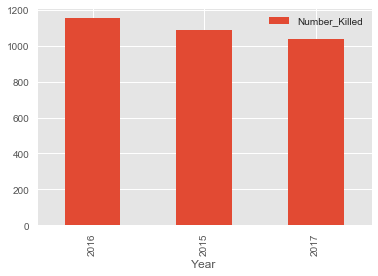

In [517]:
Killed_by_year_df.plot(kind = 'bar')

### Incident counted by State

In [473]:
df[['Incident_cnt']].groupby([df['State']]).sum().sort_values('Incident_cnt',ascending=False).head(10)

,Incident_cnt
State,
California,993
Florida,892
Texas,837
Illinois,625
Ohio,498
Georgia,494
New York,395
Pennsylvania,366
Louisiana,352


##### Suprisingly California placed on the top of the list

In [493]:
state_tpye_df = df[['Incident_cnt']].groupby([df['Incident_Type'],df['State']]).sum()
state_tpye_df

Incident_cnt
Incident_Type State                             
Defensive     Alabama                         70
              Alaska                           8
              Arizona                         32
              Arkansas                         9
              California                      62
              Colorado                        11
              Connecticut                      8
              Delaware                         3
              District of Columbia             1
              Florida                        117
...                                          ...
Unintentional South Carolina                  51
              South Dakota                     8
              Tennessee                       55
              Texas                           98
              Utah                            14
              Vermont                          6
              Virginia                        28
              Washington                      19
              West Virginia                   14
              Wisconsin                       26

[242 rows x 1 columns]

##### Next, I want to see the distribution of these data with graphs to see the distribution and if there is any outliers

In [494]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

##### Based on the above box, there is no outliers found in the train set. Next, display in historgram to see the distribution. However, even without doing this, I already think it is impossible the data has normal distribution or even close. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x171f859d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x173e96c90>]], dtype=object)

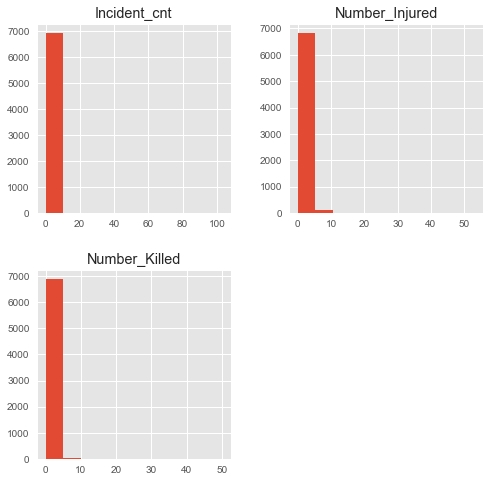

In [495]:
df[ ['Incident_cnt','Number_Killed','Number_Injured'] ].hist(figsize = (8, 8))

##### I want to find a correlation across variables, including permit yes/no. In order to do that, I am going to convert the binary string values of these columns to number 0/1. This is called one-hot encoded (I believe)

In [497]:
df['Permit_Recip'] = (df['Permit_Recip'] == "Yes")*1

In [505]:
df[['Number_Killed','Number_Injured','Incident_cnt','Permit_Recip']].corr()

,Number_Killed,Number_Injured,Incident_cnt,Permit_Recip
Number_Killed,1.000000,0.256337,0.666661,0.002532
Number_Injured,0.256337,1.000000,0.891347,-0.057984
Incident_cnt,0.666661,0.891347,1.000000,-0.043526
Permit_Recip,0.002532,-0.057984,-0.043526,1.000000


In [506]:
df[['Number_Killed','Number_Injured','Incident_cnt','Permit_Recip']].cov()

,Number_Killed,Number_Injured,Incident_cnt,Permit_Recip
Number_Killed,1.038422,0.437669,1.476091,0.000987
Number_Injured,0.437669,2.807330,3.244998,-0.037174
Incident_cnt,1.476091,3.244998,4.721089,-0.036187
Permit_Recip,0.000987,-0.037174,-0.036187,0.146410


##### From the correlation table above, it doesn't seem to have significant correlation across variables: incident_cnt vs permit reciprocity

##### Trying to use chisquare to find the relation across these 2 category variables: Permit Reciprocity vs. Unrestricted

In [ ]:
from scipy.stats import chisquare
chisquare(train_df['Incident_cnt'])

# Part_4:  Modeling & Training

##### Now that the dataset is ready, i am going to slipt them before doing the EDA

In [520]:
train_df = df.sample(frac=.7,random_state = 1)
test_df = df.drop(train_df.index)

##### check to see how many record in train & test sets

In [521]:
train_df.count() 

State                              4862
Number_Killed                      4862
Number_Injured                     4862
Incident_Type                      4862
Year                               4862
Month                              4862
Non-Resident\nPermits Available    4862
Permit_Recip                       4862
Carry Law                          4862
Campus_Carried                     4862
Incident_cnt                       4862
dtype: int64

In [522]:
test_df.count() 

State                              2083
Number_Killed                      2083
Number_Injured                     2083
Incident_Type                      2083
Year                               2083
Month                              2083
Non-Resident\nPermits Available    2083
Permit_Recip                       2083
Carry Law                          2083
Campus_Carried                     2083
Incident_cnt                       2083
dtype: int64

In [523]:
## not using these yet:
from sklearn import preprocessing, neighbors, model_selection, feature_selection, linear_model
from sklearn import metrics
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import math

### 4.1: Testing with Trees Model

In [560]:
Permit_Recip = pd.get_dummies(train_df['Permit_Recip'])
#campus_carried = pd.get_dummies(train_df['Campus_Carried'])
#Unrestricted = pd.get_dummies(train_df['Unrestricted'])
#shall_issue = pd.get_dummies(train_df['Shall-issue'])
#may_issue = pd.get_dummies(train_df['May-issue'])
#no_issue = pd.get_dummies(train_df['No-issue'])
Carry_Law = pd.get_dummies(train_df['Carry Law'])

In [576]:
#X = pd.concat((permit_reciprocity,campus_carried,shall_issue,may_issue,no_issue),axis=1)
#X = pd.concat((Permit_Recip,Carry_Law),axis=1)
X = train_df[['Permit_Recip']]

In [571]:
c = train_df.Incident_cnt

In [572]:
from sklearn import tree, externals

%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


In [573]:
model = tree.DecisionTreeClassifier().fit(X,c)

In [574]:
model.score(X,c)

0.57507198683669269

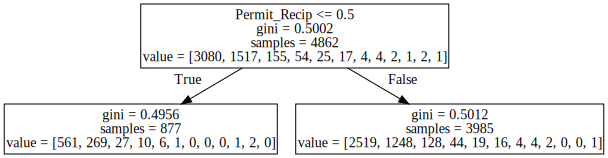

In [580]:
dot_data = externals.six.StringIO()
tree.export_graphviz(model, out_file = dot_data, feature_names = X.columns)
%dotstr dot_data.getvalue()

In [577]:
d = train_df.Number_Killed

In [578]:
model = tree.DecisionTreeClassifier().fit(X,d)

In [579]:
model.score(X,d)

0.63348416289592757

# Testing with K nearest

In [ ]:
def my_first_classifier(row):
    if row.Permi_Recip == 1:
        print 'Incident_cnt'
    else:
        print 'Incident_cnt'

In [ ]:
c_hat = df.apply(my_first_classifier, axis = 1)

c_hat

In [ ]:
(c_hat != c).sum()

# Testing with Regression

In [535]:
color = pd.Series(df["Permit_Recip"]).map({'Yes':"red", 'No':"blue"})

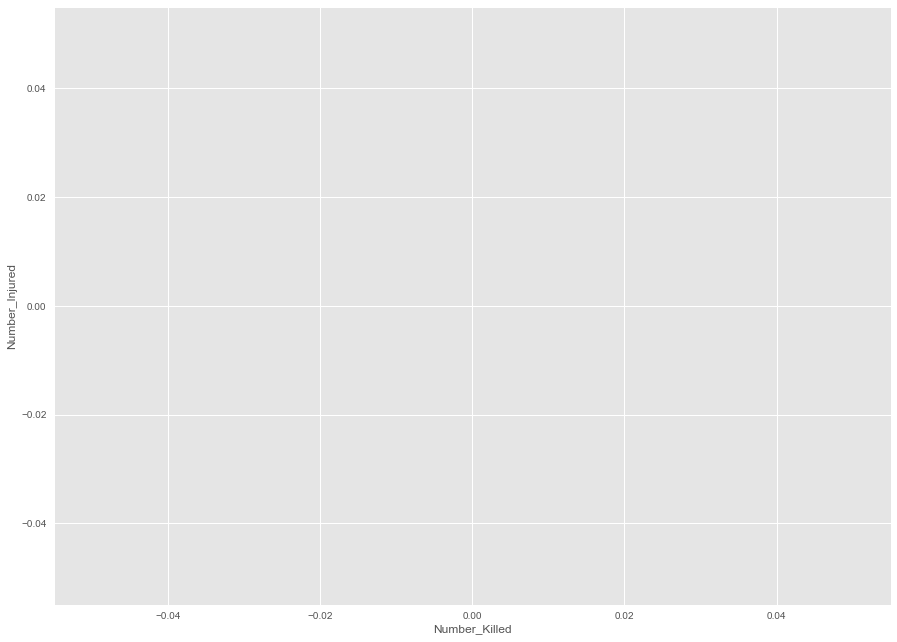

In [536]:
plt.figure(figsize=(15,11))
plt.scatter(df.Number_Killed, df.Number_Injured, c=color, s=80)
plt.xlabel("Number_Killed",)
plt.ylabel("Number_Injured");

In [537]:
plt.figure(figsize=(12,8))
plt.scatter(df.Incident_cnt, df.Permi_Recip, s=60)
plt.xlabel("Incident_cnt")
plt.ylabel("Permit_Recip");

AttributeError: 'DataFrame' object has no attribute 'Permi_Recip'